In [37]:
import torch
from torch import nn
from torch.nn import functional as F
from torch import optim
from dlc_practical_prologue import *
from projet1_helpers import *
import weight_sharing

%load_ext autoreload
%autoreload 2

# for plotting
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [168]:
import seaborn as sns
sns.set()

> 0 if first > second else 1

## Weight Sharing

Use simamiese newtwork and weight sharing for prediction. The Network predicts a single digit per image and we compare the image by subtracting the second by the first and taking the sigmoid of the result. The loss is then computed on this value. TODO: add the comparaison in the convnet, look at what is the most misclassified

In [66]:
def get_mis_class(model,input_,target,classes):
    preds = model(input_).round() == target
    misclassified = classes[~preds]
    return misclassified.tolist()

In [156]:
all_classified = []
misclassified = []
accuracies_train = []
accuracies_test = []
mini_batch_size = 100
for i in range(15):
    print("-"*50,f" \n Iteration {i} \n ")
    # Generate the pairs
    train_input, train_target, train_classes, test_input, test_target, test_classes = generate_pair_sets(1000)
    
    # define the model
    model =  weight_sharing.LeNetLike() 
    
    # train model
    for k in range(20):
        WS.train(model, train_input, train_target.float(), mini_batch_size)

    train_accuracy = weight_sharing.accuracy(model,train_input,train_target)
    test_accuracy = weight_sharing.accuracy(model,test_input,test_target)
    
    misclass = get_mis_class(model,test_input,test_target,test_classes)
    [all_classified.append(x) for x in test_classes]
    [misclassified.append(x) for x in misclass ]
    accuracies_train.append(train_accuracy )
    accuracies_test.append(test_accuracy )
    print(f"Baseline Training accuracy is {train_accuracy} ")
    print(f"Baseline Test accuracy is {test_accuracy} ")

--------------------------------------------------  
 Iteration 0 
 
Baseline Training accuracy is 0.953 
Baseline Test accuracy is 0.816 
--------------------------------------------------  
 Iteration 1 
 
Baseline Training accuracy is 0.963 
Baseline Test accuracy is 0.823 
--------------------------------------------------  
 Iteration 2 
 
Baseline Training accuracy is 0.97 
Baseline Test accuracy is 0.84 
--------------------------------------------------  
 Iteration 3 
 
Baseline Training accuracy is 0.962 
Baseline Test accuracy is 0.84 
--------------------------------------------------  
 Iteration 4 
 
Baseline Training accuracy is 0.961 
Baseline Test accuracy is 0.815 
--------------------------------------------------  
 Iteration 5 
 
Baseline Training accuracy is 0.972 
Baseline Test accuracy is 0.835 
--------------------------------------------------  
 Iteration 6 
 
Baseline Training accuracy is 0.944 
Baseline Test accuracy is 0.819 
------------------------------

### Evaluation of model performance

In [157]:
accs_train = torch.Tensor(accuracies_train)
print(f"The training accuracy of the model is {accs_train.mean():.4f} ± {accs_train.var():.4f} ")

The training accuracy of the model is 0.9619 ± 0.0001 


In [158]:
accs_test = torch.Tensor(accuracies_test)
print(f"The test accuracy of the model is {accs_test.mean():.4f} ± {accs_test.var():.4f} ")

The test accuracy of the model is 0.8302 ± 0.0001 


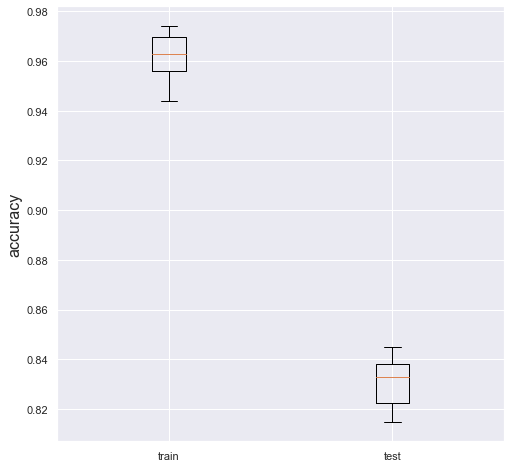

In [186]:
plot_performance(accuracies_train,accuracies_test)

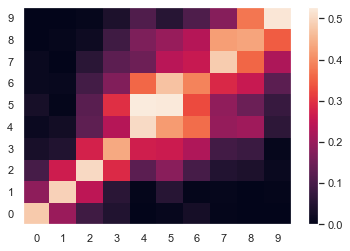

In [180]:
all_classified = np.stack(all_classified)
misclassified = np.stack(misclassified)
plot_heatmap(misclassified,all_classified)